In [ ]:
!wget http://madm.dfki.de/files/sentinel/EuroSAT.zip

--2021-04-28 14:54:40--  http://madm.dfki.de/files/sentinel/EuroSAT.zip
Resolving madm.dfki.de (madm.dfki.de)... 131.246.195.183
Connecting to madm.dfki.de (madm.dfki.de)|131.246.195.183|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 94280567 (90M) [application/zip]
Saving to: ‘EuroSAT.zip’

EuroSAT.zip         100%[===================>]  89.91M  6.00MB/s    in 27s     

2021-04-28 14:55:08 (3.35 MB/s) - ‘EuroSAT.zip’ saved [94280567/94280567]



In [ ]:
!unzip EuroSAT.zip   # unzipping the dataset

Streaming output truncated to the last 5000 lines.
  inflating: 2750/SeaLake/SeaLake_2206.jpg  
  inflating: 2750/SeaLake/SeaLake_1313.jpg  
  inflating: 2750/SeaLake/SeaLake_263.jpg  
  inflating: 2750/SeaLake/SeaLake_967.jpg  
  inflating: 2750/SeaLake/SeaLake_515.jpg  
  inflating: 2750/SeaLake/SeaLake_1465.jpg  
  inflating: 2750/SeaLake/SeaLake_1817.jpg  
  inflating: 2750/SeaLake/SeaLake_2902.jpg  
  inflating: 2750/SeaLake/SeaLake_2570.jpg  
  inflating: 2750/SeaLake/SeaLake_1004.jpg  
  inflating: 2750/SeaLake/SeaLake_174.jpg  
  inflating: 2750/SeaLake/SeaLake_2111.jpg  
  inflating: 2750/SeaLake/SeaLake_2388.jpg  
  inflating: 2750/SeaLake/SeaLake_1948.jpg  
  inflating: 2750/SeaLake/SeaLake_838.jpg  
  inflating: 2750/SeaLake/SeaLake_2738.jpg  
  inflating: 2750/SeaLake/SeaLake_1999.jpg  
  inflating: 2750/SeaLake/SeaLake_2359.jpg  
  inflating: 2750/SeaLake/SeaLake_2660.jpg  
  inflating: 2750/SeaLake/SeaLake_1775.jpg  
  inflating: 2750/SeaLake/SeaLake_605.jpg  
  inflatin

In [ ]:
!nvidia-smi # check GPU allotment (Tesla K80 alloted in this instance of 16GB)

Wed Apr 28 14:55:14 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 465.19.01    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   33C    P8    28W / 149W |      0MiB / 11441MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
!pip install pyswarms   # module for particle swarm optimization

In [ ]:
# importing all the libraries required
import matplotlib.pyplot as plt
import os
import cv2
import numpy as np 
import tensorflow as tf
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
import gc
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten,Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.nasnet import NASNetLarge
from tensorflow.keras.applications.efficientnet import EfficientNetB7
from tensorflow.keras.applications.xception import Xception
from tensorflow.keras.applications.inception_resnet_v2 import InceptionResNetV2

'''
tf.keras.backend.clear_session()

resolver = tf.distribute.cluster_resolver.TPUClusterResolver('grpc://' + os.environ['COLAB_TPU_ADDR'])
tf.config.experimental_connect_to_cluster(resolver)

# This is the TPU initialization code that has to be at the beginning.
tf.tpu.experimental.initialize_tpu_system(resolver)
print("All devices: ", tf.config.list_logical_devices('TPU'))

strategy = tf.distribute.experimental.TPUStrategy(resolver)'''


'\ntf.keras.backend.clear_session()\n\nresolver = tf.distribute.cluster_resolver.TPUClusterResolver(\'grpc://\' + os.environ[\'COLAB_TPU_ADDR\'])\ntf.config.experimental_connect_to_cluster(resolver)\n\n# This is the TPU initialization code that has to be at the beginning.\ntf.tpu.experimental.initialize_tpu_system(resolver)\nprint("All devices: ", tf.config.list_logical_devices(\'TPU\'))\n\nstrategy = tf.distribute.experimental.TPUStrategy(resolver)'

In [ ]:
# to store the entire training data
x_train=[]
y_train=[]
labels=[]

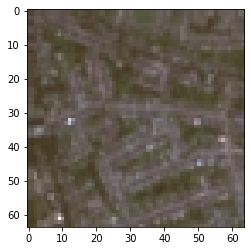

In [ ]:
# load entire training data of size 64 x 64 x 3  to main memory
l=os.listdir('/content/2750')
string='/content/2750/'
count=0
for i in l:
  l1=os.listdir(string+i+'/')
  for j in l1:
    img=cv2.imread(string+i+'/'+j)
    x_train.append(img)
    y_train.append(count)
    plt.imshow(img)
    break;
  break;  
  count+=1
  labels.append(i)  
print(kp)
  

In [ ]:
# load entire training data of size 100 x 100 x 3 to main memory only for resnet and inception network
l=os.listdir('/content/2750')
string='/content/2750/'
count=0
for i in l:
  l1=os.listdir(string+i+'/')
  for j in l1:
    img=cv2.imread(string+i+'/'+j)
    img=cv2.resize(img,(100,100))
    x_train.append(img)
    y_train.append(count)
  count+=1
  labels.append(i)  
  
  

In [ ]:
# load entire training data of size 100 x 100 x 3 to main memory only for resnet and inception network
l=os.listdir('/content/2750')
string='/content/2750/'
count=0
for i in l:
  l1=os.listdir(string+i+'/')
  for j in l1:
    img=cv2.imread(string+i+'/'+j)
    img=cv2.resize(img,(75,75))
    img=img.reshape(1,75,75,3)
    img=tf.keras.layers.UpSampling2D(size=(1,2))(img)
    x_train.append(img.numpy().reshape(75,150,3))
    y_train.append(count)
  count+=1
  labels.append(i)  
  
  

In [ ]:
x_train[0].shape

(75, 150, 3)

In [ ]:
from tensorflow.python.framework import ops
from tensorflow.python.ops import state_ops
from tensorflow.python.ops import control_flow_ops
from tensorflow.python.framework import constant_op
from tensorflow.python.training.optimizer import Optimizer
import tensorflow as tf


class COCOB(Optimizer):
    def __init__(self, alpha=100, use_locking=False, name='COCOB'):
        '''
        constructs a new COCOB optimizer
        '''
        super(COCOB, self).__init__(use_locking, name)
        self._alpha = alpha

    def _create_slots(self, var_list):
        for v in var_list:
            with ops.colocate_with(v):
                gradients_sum = constant_op.constant(0, 
                                                     shape=v.get_shape(),
                                                     dtype=v.dtype.base_dtype)
                grad_norm_sum = constant_op.constant(0, 
                                                     shape=v.get_shape(),
                                                     dtype=v.dtype.base_dtype)
                L = constant_op.constant(1e-8, shape=v.get_shape(), dtype=v.dtype.base_dtype)
                tilde_w = constant_op.constant(0.0, shape=v.get_shape(), dtype=v.dtype.base_dtype)
                reward = constant_op.constant(0.0, shape=v.get_shape(), dtype=v.dtype.base_dtype)

            self._get_or_make_slot(v, L, "L", self._name)
            self._get_or_make_slot(v, grad_norm_sum, "grad_norm_sum", self._name)
            self._get_or_make_slot(v, gradients_sum, "gradients_sum", self._name)
            self._get_or_make_slot(v, tilde_w, "tilde_w", self._name)
            self._get_or_make_slot(v, reward, "reward", self._name)

    def _apply_dense(self, grad, var):
        gradients_sum = self.get_slot(var, "gradients_sum")
        grad_norm_sum = self.get_slot(var, "grad_norm_sum")
        tilde_w = self.get_slot(var, "tilde_w")
        L = self.get_slot(var, "L")
        reward = self.get_slot(var, "reward")

        L_update = tf.maximum(L,tf.abs(grad))
        gradients_sum_update = gradients_sum + grad
        grad_norm_sum_update = grad_norm_sum + tf.abs(grad)
        reward_update = tf.maximum(reward-grad*tilde_w,0)
        new_w = -gradients_sum_update/(L_update*(tf.maximum(grad_norm_sum_update+L_update,self._alpha*L_update)))*(reward_update+L_update)
        var_update = var-tilde_w+new_w
        tilde_w_update=new_w
        
        gradients_sum_update_op = state_ops.assign(gradients_sum, gradients_sum_update)
        grad_norm_sum_update_op = state_ops.assign(grad_norm_sum, grad_norm_sum_update)
        var_update_op = state_ops.assign(var, var_update)
        tilde_w_update_op = state_ops.assign(tilde_w, tilde_w_update)
        L_update_op = state_ops.assign(L, L_update)
        reward_update_op = state_ops.assign(reward, reward_update)

        return control_flow_ops.group(*[gradients_sum_update_op,
                             var_update_op,
                             grad_norm_sum_update_op,
                             tilde_w_update_op,
                             reward_update_op,
                             L_update_op])

    def _apply_sparse(self, grad, var):
        return self._apply_dense(grad, var)

    def _resource_apply_dense(self, grad, handle):
        return self._apply_dense(grad, handle)

In [ ]:
class SGOptimizer(Optimizer):
    def __init__(self, learning_rate=0.01, name="SGOptimizer", **kwargs):
        """Call super().__init__() and use _set_hyper() to store hyperparameters"""
        super().__init__(name, **kwargs)
        self._set_hyper("learning_rate", kwargs.get("lr", learning_rate)) # handle lr=learning_rate
        self._is_first = True
    
    def _create_slots(self, var_list):
        """For each model variable, create the optimizer variable associated with it.
        TensorFlow calls these optimizer variables "slots".
        For momentum optimization, we need one momentum slot per model variable.
        """
        for var in var_list:
            self.add_slot(var, "pv") #previous variable i.e. weight or bias
        for var in var_list:
            self.add_slot(var, "pg") #previous gradient


    @tf.function
    def _resource_apply_dense(self, grad, var):
        """Update the slots and perform one optimization step for one model variable
        """
        var_dtype = var.dtype.base_dtype
        lr_t = self._decayed_lr(var_dtype) # handle learning rate decay
        new_var_m = var - grad * lr_t
        pv_var = self.get_slot(var, "pv")
        pg_var = self.get_slot(var, "pg")
        
        if self._is_first:
            self._is_first = False
            new_var = new_var_m
        else:
            cond = grad*pg_var >= 0
            print(cond)
            avg_weights = (pv_var + var)/2.0
            new_var = tf.where(cond, new_var_m, avg_weights)
        pv_var.assign(var)
        pg_var.assign(grad)
        var.assign(new_var)

    def _resource_apply_sparse(self, grad, var):
        raise NotImplementedError

    def get_config(self):
        base_config = super().get_config()
        return {
            **base_config,
            "learning_rate": self._serialize_hyperparameter("learning_rate"),
        }


    def _resource_apply_sparse(self, grad, var):
        raise NotImplementedError

    def get_config(self):
        base_config = super().get_config()
        return {
            **base_config,
            "learning_rate": self._serialize_hyperparameter("learning_rate"),
            "decay": self._serialize_hyperparameter("decay"),
            "momentum": self._serialize_hyperparameter("momentum"),
        }

In [ ]:
# do garbage collection and remove all unnecessary memory blocks 
gc.collect()
del l
del l1
del img
del i,j
print(len(x_train))

27000


In [ ]:
# convert dataset from list to array numpy
x_train=np.array(x_train)
y_train=np.array(y_train)

In [ ]:
# convert labels to categories and float32
y_train=tf.keras.utils.to_categorical(y_train,num_classes=10,dtype='float32')

In [ ]:
y_train.shape

(27000, 10)

In [ ]:
# convert x-train to float32
x_train=np.array(x_train,dtype='float32')

In [ ]:
# shuffle the dataset
x_train,y_train=shuffle(x_train,y_train)

In [ ]:
# cross validation dataset with train-69% test-30% validation=1% 
x_1,x_test,y_1,y_test=train_test_split(x_train,y_train,test_size=0.3,shuffle=False)
del x_train
del y_train
x_tr,x_cv,y_tr,y_cv=train_test_split(x_1,y_1,test_size=0.005,shuffle=False)
del x_1
del y_1

In [ ]:
# cross validation dataset with train-57% test-40% validation=3% 
x_1,x_test,y_1,y_test=train_test_split(x_train,y_train,test_size=0.4,shuffle=False)
del x_train
del y_train
x_tr,x_cv,y_tr,y_cv=train_test_split(x_1,y_1,test_size=0.05,shuffle=False)
del x_1
del y_1

In [ ]:
print(x_tr.shape)
print(x_test.shape)
print(x_cv.shape)

(18805, 75, 150, 3)
(8100, 75, 150, 3)
(95, 75, 150, 3)


In [ ]:
# do data augmentation of training data with datagen and testing and validation data with datagentest
from keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range = 0,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.2, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip = True,  # randomly flip images
        vertical_flip=True,
        rescale=1./255)  # randomly flip images

datagentest=ImageDataGenerator(rescale=1./255)
datagentest.fit(x_test)
datagentest.fit(x_cv)
datagen.fit(x_tr)

# Custom CNN Model with input (100,100,3)





In [ ]:
model=tf.keras.models.Sequential()
model.add(tf.keras.layers.Conv2D(16,kernel_size=3,strides=(1,1),activation=tf.keras.layers.LeakyReLU(0.3),input_shape=(75,150,3)))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))
model.add(tf.keras.layers.Dropout(0.3))
model.add(tf.keras.layers.Conv2D(32,kernel_size=3,strides=(1,1),activation=tf.keras.layers.LeakyReLU(0.3)))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))
model.add(tf.keras.layers.Dropout(0.3))
model.add(tf.keras.layers.Conv2D(64,kernel_size=3,strides=(1,1),activation=tf.keras.layers.LeakyReLU(0.3)))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dropout(0.3))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(1028,activation=tf.keras.layers.LeakyReLU(0.3)))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dense(750,activation=tf.keras.layers.LeakyReLU(0.3)))
model.add(tf.keras.layers.Dropout(0.3))
model.add(tf.keras.layers.Dense(512,activation=tf.keras.layers.LeakyReLU(0.3)))
   
model.add(tf.keras.layers.Dense(10,activation='softmax'))


In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 73, 148, 16)       448       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 36, 74, 16)        0         
_________________________________________________________________
dropout_12 (Dropout)         (None, 36, 74, 16)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 34, 72, 32)        4640      
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 17, 36, 32)        0         
_________________________________________________________________
dropout_13 (Dropout)         (None, 17, 36, 32)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 15, 34, 64)       

In [ ]:
model.compile(optimizer=COCOB(),loss='categorical_crossentropy',metrics=['accuracy'])
history=model.fit(datagen.flow(x_tr,y_tr,batch_size=32),epochs=30,verbose=1,validation_data=datagentest.flow(x_test,y_test))

Epoch 1/30
588/588 [==============================] - 85s 88ms/step - loss: 7.1830 - accuracy: 0.3022 - val_loss: 5.7100 - val_accuracy: 0.1701
Epoch 2/30
588/588 [==============================] - 51s 87ms/step - loss: 1.3767 - accuracy: 0.4921 - val_loss: 3.3414 - val_accuracy: 0.2711
Epoch 3/30
588/588 [==============================] - 51s 87ms/step - loss: 1.1120 - accuracy: 0.5891 - val_loss: 4.4369 - val_accuracy: 0.2895
Epoch 4/30
588/588 [==============================] - 51s 87ms/step - loss: 0.9801 - accuracy: 0.6452 - val_loss: 2.5756 - val_accuracy: 0.3951
Epoch 5/30
588/588 [==============================] - 51s 87ms/step - loss: 0.9301 - accuracy: 0.6659 - val_loss: 2.2507 - val_accuracy: 0.4144
Epoch 6/30
588/588 [==============================] - 51s 87ms/step - loss: 0.8520 - accuracy: 0.6866 - val_loss: 1.9185 - val_accuracy: 0.4858
Epoch 7/30
588/588 [==============================] - 51s 87ms/step - loss: 0.8071 - accuracy: 0.7115 - val_loss: 1.6133 - val_accuracy:

In [ ]:
model.compile(optimizer=SGOptimizer(learning_rate=0.01),loss='categorical_crossentropy',metrics=['accuracy'])
learning_rate_reduction = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_accuracy', patience = 1, verbose=1,factor=0.1, min_lr=0.000001)
history=model.fit(datagen.flow(x_tr,y_tr,batch_size=32),epochs=30,verbose=1,validation_data=datagentest.flow(x_test,y_test),callbacks=[learning_rate_reduction])

Epoch 1/30
Tensor("GreaterEqual:0", shape=(16,), dtype=bool, device=/job:localhost/replica:0/task:0/device:GPU:0)
Tensor("GreaterEqual:0", shape=(3, 3, 16, 32), dtype=bool, device=/job:localhost/replica:0/task:0/device:GPU:0)
Tensor("GreaterEqual:0", shape=(32,), dtype=bool, device=/job:localhost/replica:0/task:0/device:GPU:0)
Tensor("GreaterEqual:0", shape=(3, 3, 32, 64), dtype=bool, device=/job:localhost/replica:0/task:0/device:GPU:0)
Tensor("GreaterEqual:0", shape=(64,), dtype=bool, device=/job:localhost/replica:0/task:0/device:GPU:0)
Tensor("GreaterEqual:0", shape=(64,), dtype=bool, device=/job:localhost/replica:0/task:0/device:GPU:0)
Tensor("GreaterEqual:0", shape=(64,), dtype=bool, device=/job:localhost/replica:0/task:0/device:GPU:0)
Tensor("GreaterEqual:0", shape=(7616, 1028), dtype=bool, device=/job:localhost/replica:0/task:0/device:GPU:0)
Tensor("GreaterEqual:0", shape=(1028,), dtype=bool, device=/job:localhost/replica:0/task:0/device:GPU:0)
Tensor("GreaterEqual:0", shape=(102

In [ ]:
test_loss,test_accuracy=model.evaluate(datagentest.flow(x_cv,y_cv))  # test with the cross validation data
print('accuracy=',test_accuracy)
print('test_loss=',test_loss)

3/3 [==============================] - 0s 64ms/step - loss: 2.5216 - accuracy: 0.3789
accuracy= 0.378947377204895
test_loss= 2.5215840339660645


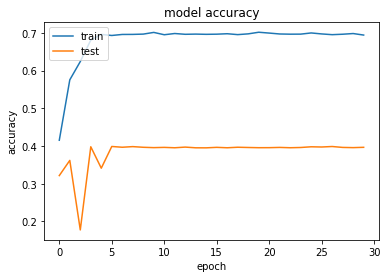

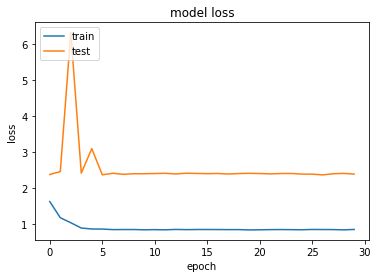

In [ ]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
model.save('shallow_model.h5')  # save the model

#hyperparameter optimizatino with GridSearchCV

In [ ]:
def best_hyperparameter(activ,opt):
    model=tf.keras.models.Sequential()
    model.add(tf.keras.layers.Conv2D(32,kernel_size=3,strides=(1,1),activation=activ,input_shape=(64,64,3)))
    model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))
    model.add(tf.keras.layers.Conv2D(64,kernel_size=3,strides=(1,1),activation=activ))
    model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))
    model.add(tf.keras.layers.BatchNormalization())

    model.add(tf.keras.layers.Flatten())
    model.add(tf.keras.layers.Dense(1028,activation=activ))
    model.add(tf.keras.layers.BatchNormalization())
    model.add(tf.keras.layers.Dense(750,activation=activ))
    model.add(tf.keras.layers.Dense(512,activation=activ))
      
    model.add(tf.keras.layers.Dense(10,activation='softmax'))
    model.compile(optimizer=opt,loss='categorical_crossentropy',metrics=['accuracy'])
    
    return model


In [ ]:
activ=['sigmoid','relu']
opt=['adam','rmsprop']

from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV

model=KerasClassifier(build_fn=best_hyperparameter,epochs=10,batch_size=32,verbose=1)
param_grid=dict(activ=activ,opt=opt)
grid=GridSearchCV(estimator=model,param_grid=param_grid)
grid_result=grid.fit(x_train,y_train)

print('best %f using %s',grid_result.best_score_,grid_result.best_params_)
means=grid_result.cv_results_['mean_test_score']
std=grid_result.cv_results_['std_test_score']
params=grid_result.cv_results_['params']
for mean,stdev,param in zip(means,std,params):
  print("%f (%f) with: %r" % (mean, stdev, param))

675/675 [==============================] - 8s 12ms/step - loss: 0.5024 - accuracy: 0.8366
Epoch 10/10
169/169 [==============================] - 1s 4ms/step - loss: 4.3524 - accuracy: 0.5411
Epoch 1/10
844/844 [==============================] - 9s 9ms/step - loss: 1.1872 - accuracy: 0.5934
Epoch 2/10
844/844 [==============================] - 8s 9ms/step - loss: 0.7093 - accuracy: 0.7486
Epoch 3/10
844/844 [==============================] - 8s 9ms/step - loss: 0.6292 - accuracy: 0.7769
Epoch 4/10
844/844 [==============================] - 8s 9ms/step - loss: 0.5419 - accuracy: 0.8061
Epoch 5/10
844/844 [==============================] - 8s 9ms/step - loss: 0.4894 - accuracy: 0.8280
Epoch 6/10
844/844 [==============================] - 8s 9ms/step - loss: 0.4023 - accuracy: 0.8605
Epoch 7/10
844/844 [==============================] - 8s 9ms/step - loss: 0.3429 - accuracy: 0.8793
Epoch 8/10
844/844 [==============================] - 8s 9ms/step - loss: 0.3093 - accuracy: 0.8930
Epoch 9/1

# AlexNet with 1/3 of the dataset reason low memory

In [ ]:
modelalex =tf.keras.models.Sequential([
        tf.keras.layers.Conv2D(filters=96, kernel_size=(11,11), strides=(4,4), activation='relu', input_shape=(227,227,3)),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.MaxPool2D(pool_size=(3,3), strides=(2,2)),
        tf.keras.layers.Conv2D(filters=256, kernel_size=(5,5), strides=(1,1), activation='relu', padding="same"),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.MaxPool2D(pool_size=(3,3), strides=(2,2)),
        tf.keras.layers.Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Conv2D(filters=384, kernel_size=(1,1), strides=(1,1), activation='relu', padding="same"),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Conv2D(filters=256, kernel_size=(1,1), strides=(1,1), activation='relu', padding="same"),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.MaxPool2D(pool_size=(3,3), strides=(2,2)),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(4096, activation='relu'),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(4096, activation='relu'),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(10, activation='softmax')
    ])
  return modelalex

#TPU usage

In [ ]:
with strategy.scope():
    modelalex=create_model()
    modelalex.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
    learning_rate_reduction = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_accuracy', patience = 1, verbose=1,factor=0.3, min_lr=0.000001)
    history=modelalex.fit(x_tr,y_tr,batch_size=32,epochs=20,verbose=1,validation_data=(x_cv,y_cv),callbacks=[learning_rate_reduction])

#GPU usage

In [ ]:
#training
modelalex.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
learning_rate_reduction = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_accuracy', patience = 1, verbose=1,factor=0.3, min_lr=0.000001)
history=modelalex.fit(x_tr,y_tr,batch_size=32,epochs=20,verbose=1,validation_data=(x_cv,y_cv),callbacks=[learning_rate_reduction])

In [ ]:
#testing
test_loss,test_accuracy=modelalex.evaluate(x_test,y_test)
print('accuracy=',test_accuracy)
print('test_loss=',test_loss)

85/85 [==============================] - 4s 40ms/step - loss: 0.5356 - accuracy: 0.8106
accuracy= 0.810580849647522
test_loss= 0.5356228351593018


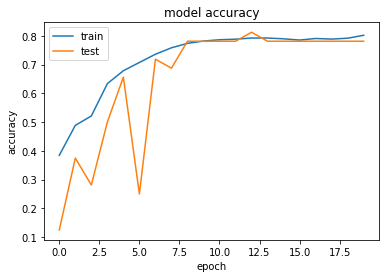

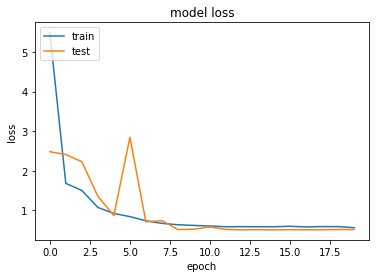

In [ ]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Inception Network with input_size (100 , 100 ,3)

In [ ]:
inception = InceptionV3(input_shape=(100,100,3), weights='imagenet', include_top=False)

87916544/87910968 [==============================] - 1s 0us/step


In [ ]:
inception.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_9 (InputLayer)            [(None, 75, 75, 3)]  0                                            
__________________________________________________________________________________________________
conv2d_94 (Conv2D)              (None, 37, 37, 32)   864         input_9[0][0]                    
__________________________________________________________________________________________________
batch_normalization_94 (BatchNo (None, 37, 37, 32)   96          conv2d_94[0][0]                  
__________________________________________________________________________________________________
activation_614 (Activation)     (None, 37, 37, 32)   0           batch_normalization_94[0][0]     
_______________________________________________________________________________________

In [ ]:
# custom Dense network attached to the inception network

modelinception=tf.keras.models.Sequential()
modelinception.add(inception)
#custom network starts below here
modelinception.add(Flatten())
modelinception.add(Dense(1024,activation=tf.keras.layers.LeakyReLU(0.3)))
modelinception.add(Dropout(0.5))
modelinception.add(Dense(512,activation=tf.keras.layers.LeakyReLU(0.3)))
modelinception.add(Dense(256,activation=tf.keras.layers.LeakyReLU(0.3)))
modelinception.add(Dropout(0.5))
modelinception.add(tf.keras.layers.Dense(10,activation='softmax'))


In [ ]:
modelinception.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inception_v3 (Functional)    (None, 1, 1, 2048)        21802784  
_________________________________________________________________
flatten_6 (Flatten)          (None, 2048)              0         
_________________________________________________________________
dense_22 (Dense)             (None, 1024)              2098176   
_________________________________________________________________
dropout_9 (Dropout)          (None, 1024)              0         
_________________________________________________________________
dense_23 (Dense)             (None, 512)               524800    
_________________________________________________________________
dense_24 (Dense)             (None, 256)               131328    
_________________________________________________________________
dropout_10 (Dropout)         (None, 256)              

In [ ]:
#training
learning_rate_fn = tf.keras.optimizers.schedules.PolynomialDecay(0.001,1000,0.000001, power=0.5)
modelinception.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate_fn),loss='categorical_crossentropy',metrics=['accuracy'])
learning_rate_reduction = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_accuracy', patience = 3, verbose=1,factor=0.1, min_lr=0.00000001)
history=modelinception.fit(datagen.flow(x_tr,y_tr,batch_size=16),epochs=60,verbose=1,validation_data=datagentest.flow(x_test,y_test),callbacks=[learning_rate_reduction])

Epoch 1/60
962/962 [==============================] - 81s 76ms/step - loss: 2.8380 - accuracy: 0.2085 - val_loss: 2.2239 - val_accuracy: 0.3355
Epoch 2/60
962/962 [==============================] - 69s 72ms/step - loss: 1.7319 - accuracy: 0.3649 - val_loss: 1.6800 - val_accuracy: 0.4770
Epoch 3/60
962/962 [==============================] - 69s 71ms/step - loss: 1.6718 - accuracy: 0.3821 - val_loss: 1.6180 - val_accuracy: 0.4780
Epoch 4/60
962/962 [==============================] - 69s 72ms/step - loss: 1.6743 - accuracy: 0.3883 - val_loss: 1.5540 - val_accuracy: 0.4871
Epoch 5/60
962/962 [==============================] - 68s 71ms/step - loss: 1.6654 - accuracy: 0.3892 - val_loss: 1.4995 - val_accuracy: 0.4869
Epoch 6/60
962/962 [==============================] - 70s 72ms/step - loss: 1.6280 - accuracy: 0.3959 - val_loss: 1.4945 - val_accuracy: 0.4931
Epoch 7/60
962/962 [==============================] - 70s 73ms/step - loss: 1.6263 - accuracy: 0.4031 - val_loss: 1.4862 - val_accuracy:

TypeError: ignored

In [ ]:
#validating the dataset
test_loss,test_accuracy=modelinception.evaluate(datagentest.flow(x_cv,y_cv))
print('accuracy=',test_accuracy)
print('test_loss=',test_loss)

In [ ]:
#training starts
modelinception.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])
learning_rate_reduction = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_accuracy', patience = 1, verbose=1,factor=0.1, min_lr=0.00000001)
history=modelinception.fit(datagen.flow(x_tr,y_tr,batch_size=32),verbose=1,epochs=20,validation_data=datagentest.flow(x_test,y_test),callbacks=[learning_rate_reduction])

Epoch 1/20
588/588 [==============================] - 79s 116ms/step - loss: 2.3829 - accuracy: 0.3005 - val_loss: 24.8747 - val_accuracy: 0.4556
Epoch 2/20
588/588 [==============================] - 66s 113ms/step - loss: 1.0417 - accuracy: 0.6762 - val_loss: 1.0522 - val_accuracy: 0.6983
Epoch 3/20
588/588 [==============================] - 66s 113ms/step - loss: 0.8864 - accuracy: 0.7439 - val_loss: 3.1836 - val_accuracy: 0.4416

Epoch 00003: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.
Epoch 4/20
588/588 [==============================] - 66s 112ms/step - loss: 0.5865 - accuracy: 0.8152 - val_loss: 0.3828 - val_accuracy: 0.9033
Epoch 5/20
588/588 [==============================] - 66s 113ms/step - loss: 0.4319 - accuracy: 0.8648 - val_loss: 0.2693 - val_accuracy: 0.9135
Epoch 6/20
588/588 [==============================] - 66s 113ms/step - loss: 0.3828 - accuracy: 0.8851 - val_loss: 0.2275 - val_accuracy: 0.9223
Epoch 7/20
588/588 [===========================

In [ ]:
#validating the dataset
test_loss,test_accuracy=modelinception.evaluate(datagentest.flow(x_cv,y_cv))
print('accuracy=',test_accuracy)
print('test_loss=',test_loss)

3/3 [==============================] - 0s 39ms/step - loss: 0.1128 - accuracy: 0.9579
accuracy= 0.9578947424888611
test_loss= 0.11280234158039093


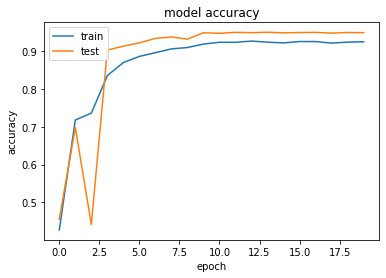

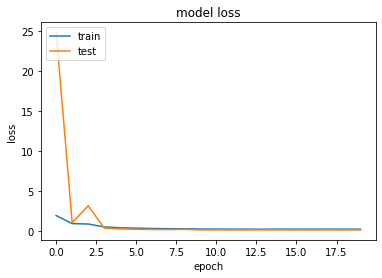

In [ ]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss"
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
modelinception.save('inception_model.h5')  # save the inception network

# RESNET 50 version 1 with input shape(100,100,3)

In [ ]:
resnet = ResNet50(input_shape=(100,100,3), weights='imagenet', include_top=False)

94773248/94765736 [==============================] - 0s 0us/step


In [ ]:
resnet.summary()

Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 75, 75, 3)]  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 81, 81, 3)    0           input_2[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 38, 38, 64)   9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 38, 38, 64)   256         conv1_conv[0][0]                 
___________________________________________________________________________________________

In [ ]:
# inserted our dense network with resnet without last layers
modelresnet=tf.keras.models.Sequential()
modelresnet.add(resnet)
# our network starts from here
modelresnet.add(Flatten())
modelresnet.add(Dense(1024,activation=tf.keras.layers.LeakyReLU(0.3)))
modelresnet.add(Dropout(0.5))
modelresnet.add(Dense(512,activation=tf.keras.layers.LeakyReLU(0.3)))
modelresnet.add(Dense(256,activation=tf.keras.layers.LeakyReLU(0.3)))
modelresnet.add(Dropout(0.5))
modelresnet.add(tf.keras.layers.Dense(10,activation='softmax'))


In [ ]:
#training
learning_rate_fn = tf.keras.optimizers.schedules.PolynomialDecay(0.001,1000,0.000001, power=0.5)
modelresnet.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate_fn),loss='categorical_crossentropy',metrics=['accuracy'])
learning_rate_reduction = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_accuracy', patience = 3, verbose=1,factor=0.1, min_lr=0.00000001)
history=modelresnet.fit(datagen.flow(x_tr,y_tr,batch_size=16),epochs=60,verbose=1,validation_data=datagentest.flow(x_test,y_test),callbacks=[learning_rate_reduction])

Epoch 1/60
962/962 [==============================] - 130s 96ms/step - loss: 3.1078 - accuracy: 0.5375 - val_loss: 2.4455 - val_accuracy: 0.4246
Epoch 2/60
962/962 [==============================] - 92s 95ms/step - loss: 0.4348 - accuracy: 0.8651 - val_loss: 0.2322 - val_accuracy: 0.9240
Epoch 3/60
962/962 [==============================] - 92s 96ms/step - loss: 0.3915 - accuracy: 0.8779 - val_loss: 0.2163 - val_accuracy: 0.9277
Epoch 4/60
962/962 [==============================] - 92s 96ms/step - loss: 0.3747 - accuracy: 0.8827 - val_loss: 0.2056 - val_accuracy: 0.9320
Epoch 5/60
962/962 [==============================] - 92s 95ms/step - loss: 0.3809 - accuracy: 0.8792 - val_loss: 0.1992 - val_accuracy: 0.9333
Epoch 6/60
962/962 [==============================] - 92s 95ms/step - loss: 0.3608 - accuracy: 0.8877 - val_loss: 0.1939 - val_accuracy: 0.9354
Epoch 7/60
962/962 [==============================] - 92s 96ms/step - loss: 0.3469 - accuracy: 0.8940 - val_loss: 0.1890 - val_accuracy

In [ ]:
#testing and validation
test_loss,test_accuracy=modelresnet.evaluate(datagentest.flow(x_cv,y_cv))
print('accuracy=',test_accuracy)
print('test_loss=',test_loss)

26/26 [==============================] - 1s 50ms/step - loss: 0.0995 - accuracy: 0.9704
accuracy= 0.970370352268219
test_loss= 0.09953664243221283


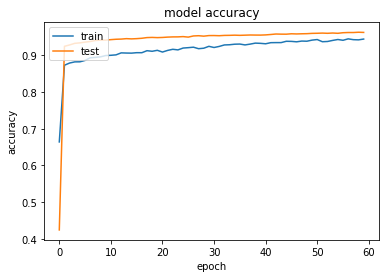

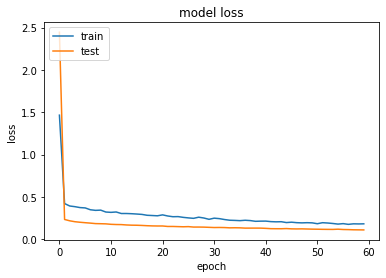

In [ ]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Resnet with batch_size 16 and epochs=60 with optimizer=rmsprop reduction of learning rate by a factor of 10 with patience 3

In [ ]:
#training
modelresnet.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
learning_rate_reduction = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_accuracy', patience = 1, verbose=1,factor=0.1, min_lr=0.00000001)
history=modelresnet.fit(datagen.flow(x_tr,y_tr,batch_size=16),epochs=30,verbose=1,validation_data=datagentest.flow(x_test,y_test),callbacks=[learning_rate_reduction])

Epoch 1/30
962/962 [==============================] - 133s 99ms/step - loss: 11.6313 - accuracy: 0.1313 - val_loss: 45.5452 - val_accuracy: 0.1772
Epoch 2/30
962/962 [==============================] - 94s 97ms/step - loss: 10.2792 - accuracy: 0.1831 - val_loss: 2.0981 - val_accuracy: 0.2390
Epoch 3/30
962/962 [==============================] - 94s 98ms/step - loss: 3.9514 - accuracy: 0.2327 - val_loss: 2.2721 - val_accuracy: 0.3404
Epoch 4/30
962/962 [==============================] - 95s 98ms/step - loss: 3.0507 - accuracy: 0.2822 - val_loss: 66.6129 - val_accuracy: 0.1971

Epoch 00004: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.
Epoch 5/30
962/962 [==============================] - 94s 98ms/step - loss: 3.2891 - accuracy: 0.2483 - val_loss: 1.7909 - val_accuracy: 0.3635
Epoch 6/30
962/962 [==============================] - 94s 98ms/step - loss: 2.0404 - accuracy: 0.2649 - val_loss: 1.7200 - val_accuracy: 0.3548

Epoch 00006: ReduceLROnPlateau reducing learning

In [ ]:
#testing and validation
test_loss,test_accuracy=modelresnet.evaluate(datagentest.flow(x_cv,y_cv))
print('accuracy=',test_accuracy)
print('test_loss=',test_loss)

26/26 [==============================] - 1s 51ms/step - loss: 1.7105 - accuracy: 0.3852
accuracy= 0.385185182094574
test_loss= 1.710545539855957


# Resnet with batch _size 32 and epochs=30 with optimizer=adam min_lr=1e-10

In [ ]:
#training
modelresnet.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
learning_rate_reduction = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_accuracy', patience = 1, verbose=1,factor=0.1, min_lr=1e-10)
history=modelresnet.fit(datagen.flow(x_tr,y_tr,batch_size=32),epochs=30,verbose=1,validation_data=datagentest.flow(x_test,y_test),callbacks=[learning_rate_reduction])

Epoch 1/30
588/588 [==============================] - 71s 111ms/step - loss: 0.4488 - accuracy: 0.8871 - val_loss: 1.2384 - val_accuracy: 0.6610
Epoch 2/30
588/588 [==============================] - 64s 109ms/step - loss: 0.3252 - accuracy: 0.9041 - val_loss: 1.2036 - val_accuracy: 0.7075
Epoch 3/30
588/588 [==============================] - 65s 110ms/step - loss: 0.3789 - accuracy: 0.8954 - val_loss: 0.5299 - val_accuracy: 0.8538
Epoch 4/30
588/588 [==============================] - 64s 109ms/step - loss: 0.2996 - accuracy: 0.9084 - val_loss: 1.2868 - val_accuracy: 0.6949

Epoch 00004: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.
Epoch 5/30
588/588 [==============================] - 65s 110ms/step - loss: 0.2045 - accuracy: 0.9350 - val_loss: 0.1518 - val_accuracy: 0.9511
Epoch 6/30
588/588 [==============================] - 64s 110ms/step - loss: 0.1734 - accuracy: 0.9454 - val_loss: 0.1695 - val_accuracy: 0.9440

Epoch 00006: ReduceLROnPlateau reducing learnin

In [ ]:
#testing and validation
test_loss,test_accuracy=modelresnet.evaluate(datagentest.flow(x_cv,y_cv))
print('accuracy=',test_accuracy)
print('test_loss=',test_loss)

3/3 [==============================] - 0s 27ms/step - loss: 0.1649 - accuracy: 0.9368
accuracy= 0.9368420839309692
test_loss= 0.16485095024108887


# Resnet with batch_size 32 and epochs=30 with optimizer=rmsprop reduction of learning rate by a factor of 10 with patience 1

In [ ]:
modelresnet.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])
learning_rate_reduction = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_accuracy', patience = 1, verbose=1,factor=0.1, min_lr=0.00000001)
history=modelresnet.fit(datagen.flow(x_tr,y_tr,batch_size=32),epochs=30,verbose=1,validation_data=datagentest.flow(x_test,y_test),callbacks=[learning_rate_reduction])

Epoch 1/30
481/481 [==============================] - 192s 370ms/step - loss: 3.1583 - accuracy: 0.4022 - val_loss: 6.3551 - val_accuracy: 0.1109
Epoch 2/30
481/481 [==============================] - 176s 366ms/step - loss: 1.1762 - accuracy: 0.6352 - val_loss: 3.5623 - val_accuracy: 0.1727
Epoch 3/30
481/481 [==============================] - 176s 366ms/step - loss: 0.7966 - accuracy: 0.7437 - val_loss: 2.1925 - val_accuracy: 0.5986
Epoch 4/30
481/481 [==============================] - 176s 366ms/step - loss: 0.6855 - accuracy: 0.7957 - val_loss: 2.6453 - val_accuracy: 0.5252

Epoch 00004: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.
Epoch 5/30
481/481 [==============================] - 176s 366ms/step - loss: 0.3822 - accuracy: 0.8822 - val_loss: 0.3157 - val_accuracy: 0.8957
Epoch 6/30
481/481 [==============================] - 176s 365ms/step - loss: 0.3057 - accuracy: 0.9010 - val_loss: 0.3110 - val_accuracy: 0.9014
Epoch 7/30
481/481 [======================

In [ ]:
#testing
test_loss,test_accuracy=modelresnet.evaluate(datagentest.flow(x_cv,y_cv))
print('accuracy=',test_accuracy)
print('test_loss=',test_loss)

26/26 [==============================] - 2s 93ms/step - loss: 0.1082 - accuracy: 0.9654
accuracy= 0.9654321074485779
test_loss= 0.10815130919218063


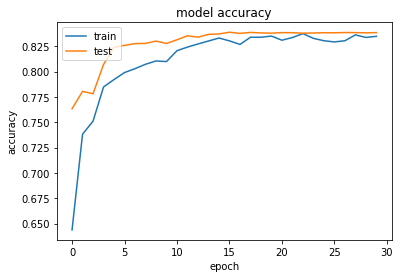

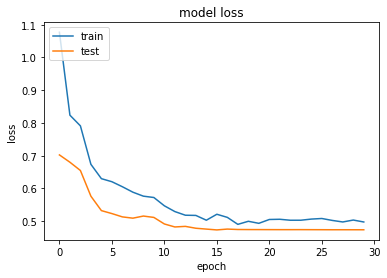

In [ ]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
modelres.save('res_model.h5')

# VGG16  network with input_size=(100,100,3)


In [ ]:
vgg16 = VGG16(weights='imagenet', include_top=False,input_shape=(100,100,3))

In [ ]:
modelvgg16.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 2, 2, 512)         14714688  
_________________________________________________________________
flatten_2 (Flatten)          (None, 2048)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 1024)              2098176   
_________________________________________________________________
dropout (Dropout)            (None, 1024)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 512)               524800    
_________________________________________________________________
dense_3 (Dense)              (None, 256)               131328    
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)              

In [ ]:
# we have sandwitched vgg16 with our model and fine tuned
modelvgg16=tf.keras.models.Sequential()
modelvgg16.add(vgg16)
# our model starts from here
modelvgg16.add(Flatten())
modelvgg16.add(Dense(1024,activation=tf.keras.layers.LeakyReLU(0.3)))
modelvgg16.add(Dropout(0.5))
modelvgg16.add(Dense(512,activation=tf.keras.layers.LeakyReLU(0.3)))
modelvgg16.add(Dense(256,activation=tf.keras.layers.LeakyReLU(0.3)))
modelvgg16.add(Dropout(0.5))
modelvgg16.add(tf.keras.layers.Dense(10,activation='softmax'))


In [ ]:
# training with batch_size=32 and epochs 30
modelvgg16.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])
learning_rate_reduction = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_accuracy', patience = 1, verbose=1,factor=0.1, min_lr=0.00000001)
history=modelvgg16.fit(datagen.flow(x_tr,y_tr,batch_size=32),epochs=30,verbose=1,validation_data=datagentest.flow(x_test,y_test),callbacks=[learning_rate_reduction])

Epoch 1/30
481/481 [==============================] - 69s 136ms/step - loss: 646.6818 - accuracy: 0.1119 - val_loss: 2.2975 - val_accuracy: 0.1068
Epoch 2/30
481/481 [==============================] - 62s 130ms/step - loss: 2.2983 - accuracy: 0.1076 - val_loss: 2.3013 - val_accuracy: 0.1074
Epoch 3/30
481/481 [==============================] - 62s 129ms/step - loss: 2.2964 - accuracy: 0.1166 - val_loss: 2.2976 - val_accuracy: 0.1074

Epoch 00003: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.
Epoch 4/30
481/481 [==============================] - 62s 129ms/step - loss: 2.2974 - accuracy: 0.1126 - val_loss: 2.2965 - val_accuracy: 0.1083
Epoch 5/30
481/481 [==============================] - 62s 129ms/step - loss: 2.2945 - accuracy: 0.1192 - val_loss: 2.2965 - val_accuracy: 0.1074

Epoch 00005: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.
Epoch 6/30
481/481 [==============================] - 62s 129ms/step - loss: 2.2936 - accuracy: 0.1106 - val_

In [ ]:
# testing and validation
test_loss,test_accuracy=modelvgg16.evaluate(datagentest.flow(x_cv,y_cv))
print('accuracy=',test_accuracy)
print('test_loss=',test_loss)

26/26 [==============================] - 1s 57ms/step - loss: 2.2931 - accuracy: 0.1074
accuracy= 0.10740740597248077
test_loss= 2.293138027191162


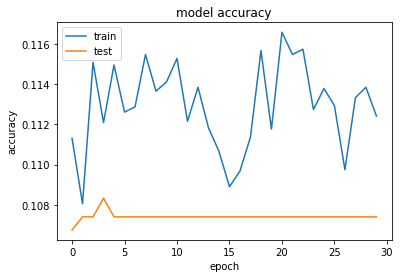

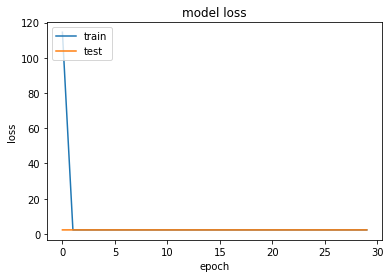

In [ ]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
modelvgg16.save('vgg16.h5')

# NASNet Large with input size=(331,331,3)

In [ ]:
nasnetl= NASNetLarge(weights='imagenet', include_top=False,input_shape=(331,331,3))

343613440/343610240 [==============================] - 2s 0us/step


In [ ]:
nasnet.summary()

Model: "NASNet"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 331, 331, 3) 0                                            
__________________________________________________________________________________________________
stem_conv1 (Conv2D)             (None, 165, 165, 96) 2592        input_1[0][0]                    
__________________________________________________________________________________________________
stem_bn1 (BatchNormalization)   (None, 165, 165, 96) 384         stem_conv1[0][0]                 
__________________________________________________________________________________________________
activation (Activation)         (None, 165, 165, 96) 0           stem_bn1[0][0]                   
_____________________________________________________________________________________________

In [ ]:
# fine tuned nasnet with our dense net
modelnasnet=tf.keras.models.Sequential()
modelnasnet.add(nasnetl)
#our model starts from here
modelnasnet.add(Flatten())
modelnasnet.add(Dense(1024,activation=tf.keras.layers.LeakyReLU(0.3)))
modelnasnet.add(Dropout(0.5))
modelnasnet.add(Dense(512,activation=tf.keras.layers.LeakyReLU(0.3)))
modelnasnet.add(Dense(256,activation=tf.keras.layers.LeakyReLU(0.3)))
modelnasnet.add(Dropout(0.5))
modelnasnet.add(tf.keras.layers.Dense(10,activation='softmax'))

In [ ]:
modelnasnet.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
NASNet (Functional)          (None, 11, 11, 4032)      84916818  
_________________________________________________________________
flatten_4 (Flatten)          (None, 487872)            0         
_________________________________________________________________
dense_9 (Dense)              (None, 1024)              499581952 
_________________________________________________________________
dropout_4 (Dropout)          (None, 1024)              0         
_________________________________________________________________
dense_10 (Dense)             (None, 512)               524800    
_________________________________________________________________
dense_11 (Dense)             (None, 256)               131328    
_________________________________________________________________
dropout_5 (Dropout)          (None, 256)              

In [ ]:
#training 
modelnasnet.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])
learning_rate_reduction = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_accuracy', patience = 1, verbose=1,factor=0.1, min_lr=0.00000001)
history=modelnasnet.fit(datagen.flow(x_tr,y_tr,batch_size=16),epochs=30,verbose=1,validation_data=datagentest.flow(x_test,y_test),callbacks=[learning_rate_reduction])

Epoch 1/30


InvalidArgumentError: ignored

# VGG 19 with input size=(100,100,3)

In [ ]:
modelvgg19 = VGG19(weights='imagenet', include_top=False,input_shape=(100,100,3)) #downloading the model

In [ ]:
modelvgg19.summary()

Model: "vgg19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         [(None, 75, 75, 3)]       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 75, 75, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 75, 75, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 37, 37, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 37, 37, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 37, 37, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 18, 18, 128)       0     

In [ ]:
# added our own dense net with VGG 19
modelvgg19p=tf.keras.models.Sequential()
modelvgg19p.add(modelvgg19)
# our model starts from here
modelvgg19p.add(Flatten())
modelvgg19p.add(Dense(1024,activation=tf.keras.layers.LeakyReLU(0.3)))
modelvgg19p.add(Dropout(0.5))
modelvgg19p.add(Dense(512,activation=tf.keras.layers.LeakyReLU(0.3)))
modelvgg19p.add(Dense(256,activation=tf.keras.layers.LeakyReLU(0.3)))
modelvgg19p.add(Dropout(0.5))
modelvgg19p.add(tf.keras.layers.Dense(10,activation='softmax'))


In [ ]:
modelvgg19p.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg19 (Functional)           (None, 2, 2, 512)         20024384  
_________________________________________________________________
flatten_5 (Flatten)          (None, 2048)              0         
_________________________________________________________________
dense_18 (Dense)             (None, 1024)              2098176   
_________________________________________________________________
dropout_7 (Dropout)          (None, 1024)              0         
_________________________________________________________________
dense_19 (Dense)             (None, 512)               524800    
_________________________________________________________________
dense_20 (Dense)             (None, 256)               131328    
_________________________________________________________________
dropout_8 (Dropout)          (None, 256)              

In [ ]:
# training 
modelvgg19p.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])
learning_rate_reduction = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_accuracy', patience = 1, verbose=1,factor=0.1, min_lr=0.00000001)
history=modelvgg19p.fit(datagen.flow(x_tr,y_tr,batch_size=32),epochs=30,verbose=1,validation_data=datagentest.flow(x_test,y_test),callbacks=[learning_rate_reduction])

Epoch 1/30
481/481 [==============================] - 71s 145ms/step - loss: 2.2982 - accuracy: 0.1129 - val_loss: 2.2997 - val_accuracy: 0.1068
Epoch 2/30
481/481 [==============================] - 71s 148ms/step - loss: 2.2991 - accuracy: 0.1088 - val_loss: 2.2987 - val_accuracy: 0.1166
Epoch 3/30
481/481 [==============================] - 72s 149ms/step - loss: 2.2964 - accuracy: 0.1134 - val_loss: 2.3068 - val_accuracy: 0.1083

Epoch 00003: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.
Epoch 4/30
481/481 [==============================] - 71s 148ms/step - loss: 2.2980 - accuracy: 0.1060 - val_loss: 2.2969 - val_accuracy: 0.1083

Epoch 00004: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.
Epoch 5/30
481/481 [==============================] - 71s 148ms/step - loss: 2.2972 - accuracy: 0.1062 - val_loss: 2.2968 - val_accuracy: 0.1083

Epoch 00005: ReduceLROnPlateau reducing learning rate to 1.0000000656873453e-06.
Epoch 6/30
481/481 [=========

In [ ]:
#testing
test_loss,test_accuracy=modelvgg16.evaluate(datagentest.flow(x_cv,y_cv))
print('accuracy=',test_accuracy)
print('test_loss=',test_loss)

26/26 [==============================] - 1s 32ms/step - loss: 2.2931 - accuracy: 0.1074
accuracy= 0.10740740597248077
test_loss= 2.293138027191162


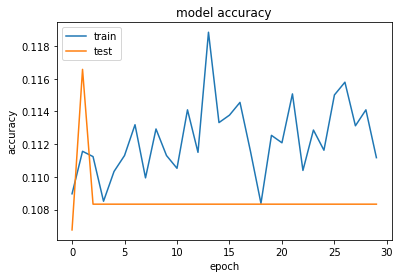

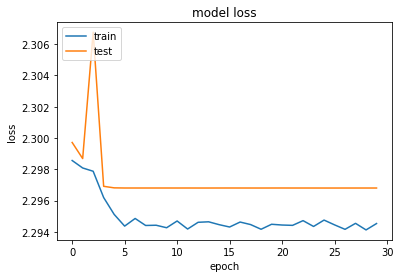

In [ ]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# EfficientNet B7 with epochs=30 batch_size=32 optimizer=rmsprop

In [ ]:
efficientnetb7= EfficientNetB7(weights='imagenet', include_top=False,input_shape=(100,100,3))

258080768/258076736 [==============================] - 2s 0us/step


In [ ]:
# we have sandwitched vgg16 with our model and fine tuned
modelefficientnet=tf.keras.models.Sequential()
modelefficientnet.add(efficientnetb7)
# our model starts from here
modelefficientnet.add(Flatten())
modelefficientnet.add(Dense(1024,activation=tf.keras.layers.LeakyReLU(0.3)))
modelefficientnet.add(Dropout(0.5))
modelefficientnet.add(Dense(512,activation=tf.keras.layers.LeakyReLU(0.3)))
modelefficientnet.add(Dense(256,activation=tf.keras.layers.LeakyReLU(0.3)))
modelefficientnet.add(Dropout(0.5))
modelefficientnet.add(tf.keras.layers.Dense(10,activation='softmax'))


In [ ]:
# training 
modelefficientnet.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])
learning_rate_reduction = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_accuracy', patience = 1, verbose=1,factor=0.1, min_lr=0.00000001)
history=modelefficientnet.fit(datagen.flow(x_tr,y_tr,batch_size=32),epochs=30,verbose=1,validation_data=datagentest.flow(x_test,y_test),callbacks=[learning_rate_reduction])

Epoch 1/30
481/481 [==============================] - 304s 461ms/step - loss: 7.7354 - accuracy: 0.2778 - val_loss: 9.7812 - val_accuracy: 0.1134
Epoch 2/30
481/481 [==============================] - 216s 448ms/step - loss: 2.6278 - accuracy: 0.3937 - val_loss: 2.5621 - val_accuracy: 0.0937

Epoch 00002: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.
Epoch 3/30
481/481 [==============================] - 216s 448ms/step - loss: 1.1805 - accuracy: 0.6089 - val_loss: 1.1512 - val_accuracy: 0.6273
Epoch 4/30
481/481 [==============================] - 216s 448ms/step - loss: 0.8127 - accuracy: 0.7254 - val_loss: 1.3392 - val_accuracy: 0.6089

Epoch 00004: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.
Epoch 5/30
481/481 [==============================] - 216s 448ms/step - loss: 0.6706 - accuracy: 0.7651 - val_loss: 0.5515 - val_accuracy: 0.8356
Epoch 6/30
481/481 [==============================] - 216s 448ms/step - loss: 0.6384 - accuracy: 0.7804 - 

In [ ]:
#testing
test_loss,test_accuracy=modelefficientnet.evaluate(datagentest.flow(x_cv,y_cv))
print('accuracy=',test_accuracy)
print('test_loss=',test_loss)

26/26 [==============================] - 3s 96ms/step - loss: 0.4966 - accuracy: 0.8481
accuracy= 0.8481481671333313
test_loss= 0.49657735228538513


In [ ]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

NameError: ignored

# Hyperparamter optimization using PSO

In [ ]:
def f(x):
  return x*x;

In [ ]:
import pyswarms as ps
# particle swarm module

# Initialize swarm
options = {'c1': 0.5, 'c2': 0.3, 'w':0.9}
kwargs={"a": 1.0, "b": 100.0, 'c':0}
# Call instance of PSO
dimensions = 10
optimizer = ps.single.GlobalBestPSO(n_particles=15, dimensions=dimensions, options=options)

# Perform optimization
cost, pos = optimizer.optimize(f, iters=10, verbose=3)

2021-04-01 07:51:07,666 - pyswarms.single.global_best - INFO - Optimize for 10 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}




pyswarms.single.global_best:   0%|          |0/10

ValueError: ignored

In [ ]:
model.compile(optimizer=optimize,loss='categorical_crossentropy',metrics=['accuracy'])
learning_rate_reduction = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_accuracy', patience = 1, verbose=1,factor=0.1, min_lr=0.000001)
history=model.fit(datagen.flow(x_tr,y_tr,batch_size=32),epochs=30,verbose=1,validation_data=datagentest.flow(x_test,y_test),callbacks=[learning_rate_reduction])

ValueError: ignored

# XCEPTION

In [ ]:
xception=Xception(weights='imagenet', include_top=False,input_shape=(100,100,3))

83689472/83683744 [==============================] - 2s 0us/step


In [ ]:
# we have sandwitched xception with our model and fine tuned
modelxception=tf.keras.models.Sequential()
modelxception.add(xception)
# our model starts from here
modelxception.add(Flatten())
modelxception.add(Dense(1024,activation=tf.keras.layers.LeakyReLU(0.3)))
modelxception.add(Dropout(0.5))
modelxception.add(Dense(512,activation=tf.keras.layers.LeakyReLU(0.3)))
modelxception.add(Dense(256,activation=tf.keras.layers.LeakyReLU(0.3)))
modelxception.add(Dropout(0.5))
modelxception.add(tf.keras.layers.Dense(10,activation='softmax'))


In [ ]:
# training 
modelxception.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])
learning_rate_reduction = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_accuracy', patience = 1, verbose=1,factor=0.1, min_lr=0.00000001)
history=modelxception.fit(datagen.flow(x_tr,y_tr,batch_size=32),epochs=30,verbose=1,validation_data=datagentest.flow(x_test,y_test),callbacks=[learning_rate_reduction])

Epoch 1/30
481/481 [==============================] - 218s 372ms/step - loss: 1.9189 - accuracy: 0.3431 - val_loss: 0.6970 - val_accuracy: 0.8315
Epoch 2/30
481/481 [==============================] - 176s 365ms/step - loss: 0.6906 - accuracy: 0.8334 - val_loss: 0.7854 - val_accuracy: 0.8575
Epoch 3/30
481/481 [==============================] - 176s 365ms/step - loss: 0.4962 - accuracy: 0.8842 - val_loss: 1.5762 - val_accuracy: 0.8698
Epoch 4/30
481/481 [==============================] - 176s 365ms/step - loss: 0.4132 - accuracy: 0.9085 - val_loss: 8.6799 - val_accuracy: 0.7979

Epoch 00004: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.
Epoch 5/30
481/481 [==============================] - 175s 365ms/step - loss: 0.2737 - accuracy: 0.9408 - val_loss: 0.0925 - val_accuracy: 0.9742
Epoch 6/30
481/481 [==============================] - 176s 365ms/step - loss: 0.1540 - accuracy: 0.9578 - val_loss: 0.0819 - val_accuracy: 0.9773
Epoch 7/30
481/481 [======================

In [ ]:
#testing
test_loss,test_accuracy=modelxception.evaluate(datagentest.flow(x_cv,y_cv))
print('accuracy=',test_accuracy)
print('test_loss=',test_loss)

26/26 [==============================] - 2s 91ms/step - loss: 0.0878 - accuracy: 0.9765
accuracy= 0.9765431880950928
test_loss= 0.08778362721204758


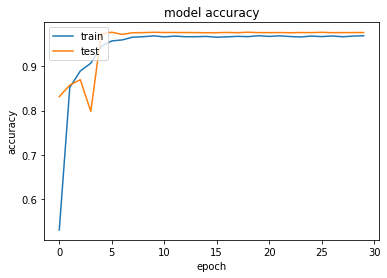

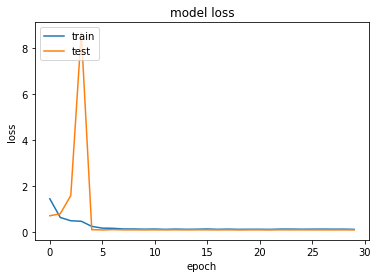

In [ ]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# InceptionResNetV2

In [ ]:
inceptionresnet=InceptionResNetV2(weights='imagenet', include_top=False,input_shape=(75,150,3))

219062272/219055592 [==============================] - 2s 0us/step


In [ ]:
# we have sandwitched xception with our model and fine tuned
modelinceptionres=tf.keras.models.Sequential()
modelinceptionres.add(inceptionresnet)
# our model starts from here
modelinceptionres.add(Flatten())
modelinceptionres.add(Dense(1024,activation=tf.keras.layers.LeakyReLU(0.3)))
modelinceptionres.add(Dropout(0.5))
modelinceptionres.add(Dense(512,activation=tf.keras.layers.LeakyReLU(0.3)))
modelinceptionres.add(Dense(256,activation=tf.keras.layers.LeakyReLU(0.3)))
modelinceptionres.add(Dropout(0.5))
modelinceptionres.add(tf.keras.layers.Dense(10,activation='softmax'))


In [ ]:
# training 
modelinceptionres.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
learning_rate_reduction = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_accuracy', patience = 1, verbose=1,factor=0.1, min_lr=0.00000001)
history=modelinceptionres.fit(datagen.flow(x_tr,y_tr,batch_size=32),epochs=30,verbose=1,validation_data=datagentest.flow(x_test,y_test),callbacks=[learning_rate_reduction])

Epoch 1/30
481/481 [==============================] - 287s 492ms/step - loss: 3.1251 - accuracy: 0.5729 - val_loss: 2.0963 - val_accuracy: 0.8278
Epoch 2/30
481/481 [==============================] - 230s 479ms/step - loss: 0.4819 - accuracy: 0.8649 - val_loss: 0.9849 - val_accuracy: 0.8851
Epoch 3/30
481/481 [==============================] - 231s 480ms/step - loss: 0.3061 - accuracy: 0.9090 - val_loss: 10.4239 - val_accuracy: 0.8167

Epoch 00003: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.
Epoch 4/30
481/481 [==============================] - 231s 480ms/step - loss: 0.2292 - accuracy: 0.9275 - val_loss: 0.3942 - val_accuracy: 0.9545
Epoch 5/30
481/481 [==============================] - 231s 480ms/step - loss: 0.1597 - accuracy: 0.9481 - val_loss: 0.3097 - val_accuracy: 0.9556
Epoch 6/30
481/481 [==============================] - 231s 481ms/step - loss: 0.1404 - accuracy: 0.9535 - val_loss: 0.2024 - val_accuracy: 0.9628
Epoch 7/30
481/481 [=====================

In [ ]:
#testing
test_loss,test_accuracy=modelinceptionres.evaluate(datagentest.flow(x_cv,y_cv))
print('accuracy=',test_accuracy)
print('test_loss=',test_loss)

26/26 [==============================] - 4s 148ms/step - loss: 0.1346 - accuracy: 0.9568
accuracy= 0.9567901492118835
test_loss= 0.13455450534820557


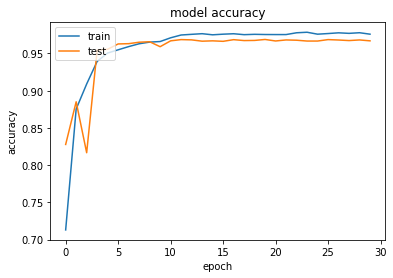

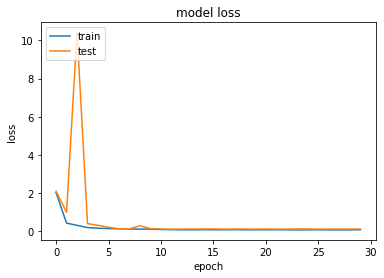

In [ ]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
# training 
modelinceptionres.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
learning_rate_reduction = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_accuracy', patience = 3, verbose=1,factor=0.1, min_lr=0.000000001)
history=modelinceptionres.fit(datagen.flow(x_tr,y_tr,batch_size=32),epochs=60,verbose=1,validation_data=datagentest.flow(x_test,y_test),callbacks=[learning_rate_reduction])

Epoch 1/60
481/481 [==============================] - 164s 239ms/step - loss: 2.6222 - accuracy: 0.5809 - val_loss: 0.3714 - val_accuracy: 0.8879
Epoch 2/60
481/481 [==============================] - 110s 229ms/step - loss: 0.6590 - accuracy: 0.8613 - val_loss: 0.6912 - val_accuracy: 0.9211
Epoch 3/60
481/481 [==============================] - 111s 230ms/step - loss: 0.5380 - accuracy: 0.8668 - val_loss: 1.6049 - val_accuracy: 0.8630
Epoch 4/60
481/481 [==============================] - 111s 230ms/step - loss: 0.3540 - accuracy: 0.8966 - val_loss: 0.2676 - val_accuracy: 0.9106
Epoch 5/60
481/481 [==============================] - 112s 233ms/step - loss: 0.2895 - accuracy: 0.9180 - val_loss: 2.3104 - val_accuracy: 0.8799

Epoch 00005: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.
Epoch 6/60
481/481 [==============================] - 111s 231ms/step - loss: 0.2169 - accuracy: 0.9315 - val_loss: 0.4092 - val_accuracy: 0.9536
Epoch 7/60
481/481 [======================

In [ ]:
#testing
test_loss,test_accuracy=modelinceptionres.evaluate(datagentest.flow(x_cv,y_cv))
print('accuracy=',test_accuracy)
print('test_loss=',test_loss)

26/26 [==============================] - 2s 75ms/step - loss: 0.5560 - accuracy: 0.9667
accuracy= 0.9666666388511658
test_loss= 0.5560402274131775


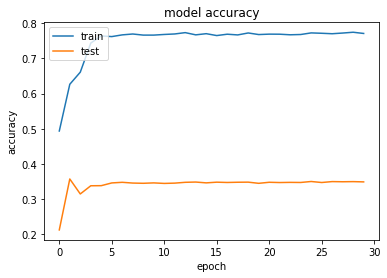

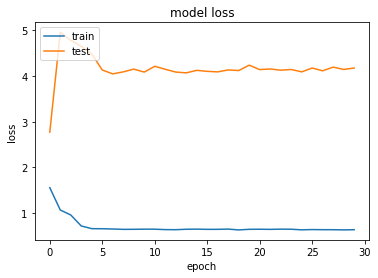

In [ ]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
# training 
modelinceptionres.compile(optimizer=SGOptimizer(learning_rate=0.01),loss='categorical_crossentropy',metrics=['accuracy'])
learning_rate_reduction = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_accuracy', patience = 3, verbose=1,factor=0.1, min_lr=0.000000001)
history=modelinceptionres.fit(datagen.flow(x_tr,y_tr,batch_size=32),epochs=60,verbose=1,validation_data=datagentest.flow(x_test,y_test),callbacks=[learning_rate_reduction])

Epoch 1/60
Tensor("GreaterEqual:0", shape=(32,), dtype=bool, device=/job:localhost/replica:0/task:0/device:GPU:0)
Tensor("GreaterEqual:0", shape=(3, 3, 32, 32), dtype=bool, device=/job:localhost/replica:0/task:0/device:GPU:0)
Tensor("GreaterEqual:0", shape=(32,), dtype=bool, device=/job:localhost/replica:0/task:0/device:GPU:0)
Tensor("GreaterEqual:0", shape=(3, 3, 32, 64), dtype=bool, device=/job:localhost/replica:0/task:0/device:GPU:0)
Tensor("GreaterEqual:0", shape=(64,), dtype=bool, device=/job:localhost/replica:0/task:0/device:GPU:0)
Tensor("GreaterEqual:0", shape=(1, 1, 64, 80), dtype=bool, device=/job:localhost/replica:0/task:0/device:GPU:0)
Tensor("GreaterEqual:0", shape=(80,), dtype=bool, device=/job:localhost/replica:0/task:0/device:GPU:0)
Tensor("GreaterEqual:0", shape=(3, 3, 80, 192), dtype=bool, device=/job:localhost/replica:0/task:0/device:GPU:0)
Tensor("GreaterEqual:0", shape=(192,), dtype=bool, device=/job:localhost/replica:0/task:0/device:GPU:0)
Tensor("GreaterEqual:0",

In [ ]:
#testing
test_loss,test_accuracy=modelinceptionres.evaluate(datagentest.flow(x_cv,y_cv))
print('accuracy=',test_accuracy)
print('test_loss=',test_loss)

26/26 [==============================] - 2s 78ms/step - loss: 0.1182 - accuracy: 0.9667
accuracy= 0.9666666388511658
test_loss= 0.1182018518447876


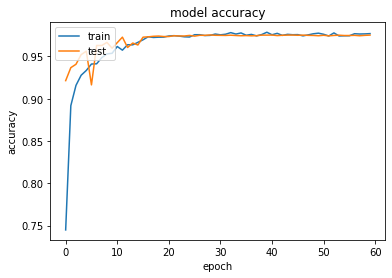

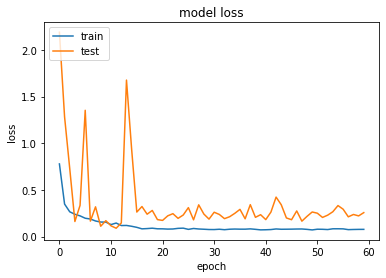

In [ ]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
import pyswarms as ps
from pyswarms.utils.functions import single_obj as fx
from pyswarms.utils.plotters import plot_cost_history, plot_contour, plot_surface
import matplotlib.pyplot as plt
# Set-up optimizer
options = {'c1':0.5, 'c2':0.3, 'w':0.9}
optimizer = ps.single.GlobalBestPSO(n_particles=50, dimensions=200, options=options)
optimizer.optimize(model, iters=100)
# Plot the cost


2021-04-02 11:34:44,864 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}


pyswarms.single.global_best:   0%|          |0/100

ValueError: ignored

In [ ]:
import numpy as np
import pyswarms as ps
from pyswarms.utils.search import RandomSearch
from pyswarms.utils.functions import single_obj as fx

# Set-up choices for the parameters
options = {
    'c1': (1,5),
    'c2': (6,10),
    'w': (2,5),
    'k': (11, 15),
    'p': 1
}

# Create a RandomSearch object
# n_selection_iters is the number of iterations to run the searcher
# iters is the number of iterations to run the optimizer
g = RandomSearch(ps.single.LocalBestPSO, n_particles=40,
            dimensions=20, options=options, objective_func=fx.sphere,
            iters=10, n_selection_iters=100)

best_score, best_options = g.search()

Streaming output truncated to the last 5000 lines.


pyswarms.single.local_best:   0%|          |0/10, best_cost=3.94



pyswarms.single.local_best:   0%|          |0/10, best_cost=3.94



pyswarms.single.local_best:   0%|          |0/10, best_cost=3.94



pyswarms.single.local_best:   0%|          |0/10, best_cost=3.94



pyswarms.single.local_best: 100%|██████████|10/10, best_cost=3.94
2021-04-01 07:25:50,407 - pyswarms.single.local_best - INFO - Optimization finished | best cost: 3.937080769478753, best pos: [0.47181764 0.68655761 0.79335049 0.03091304 0.025532   0.22038282
 0.29090127 0.41736464 0.44672159 0.76059093 0.20809132 0.95217229
 0.07266271 0.0916589  0.14433492 0.14494174 0.16841583 0.18889494
 0.19176078 0.64836529]
2021-04-01 07:25:50,417 - pyswarms.single.local_best - INFO - Optimize for 10 iters with {'c1': 1.6156516784764308, 'c2': 6.974068169602269, 'w': 4.980851125099107, 'k': 13, 'p': 1}




pyswarms.single.local_best:   0%|          |0/10



pyswarms.single.loca

#Useless Codes with may be used later


In [ ]:
opt=[0.2,0.3,0.4,0.5,0.6]

from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV

model=KerasClassifier(build_fn=best_hyperparameter,epochs=30,batch_size=16,verbose=1)
param_grid=dict(opt=opt)
grid=GridSearchCV(estimator=model,param_grid=param_grid)
grid_result=grid.fit(x_train,y_train)

print('best %f using %s',grid_result.best_score_,grid_result.best_params_)
means=grid_result.cv_results_['mean_test_score']
std=grid_result.cv_results_['std_test_score']
params=grid_result.cv_results_['params']
for mean,stdev,param in zip(means,std,params):
  print("%f (%f) with: %r" % (mean, stdev, param))

In [ ]:
inception = InceptionV3(input_shape=(75,75,3), weights='imagenet', include_top=False)
for layer in inception.layers:
    layer.trainable = False

def best_hyperparameter(opt):
    model=tf.keras.models.Sequential()
    model.add(inception)
    model.add(tf.keras.layers.Flatten())
    model.add(tf.keras.layers.Dense(1024,activation='relu'))
    model.add(tf.keras.layers.Dropout(opt))
    model.add(tf.keras.layers.Dense(512,activation='relu'))
    model.add(tf.keras.layers.Dense(256,activation='relu'))
    model.add(tf.keras.layers.Dropout(opt))
    model.add(tf.keras.layers.Dense(10,activation='softmax'))
    model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
    
    return model

In [ ]:
def best_hyperparameter(activ,opt):
    model=tf.keras.models.Sequential()
    model.add(tf.keras.layers.Conv2D(32,kernel_size=3,strides=(1,1),activation=activ,input_shape=(100,100,3)))
    model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))
    model.add(tf.keras.layers.Conv2D(64,kernel_size=3,strides=(1,1),activation=activ))
    model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))
    model.add(tf.keras.layers.BatchNormalization())

    model.add(tf.keras.layers.Flatten())
    model.add(tf.keras.layers.Dense(1028,activation=activ))
    model.add(tf.keras.layers.BatchNormalization())
    model.add(tf.keras.layers.Dense(750,activation=activ))
    model.add(tf.keras.layers.Dense(512,activation=activ))
      
    model.add(tf.keras.layers.Dense(10,activation='softmax'))
    model.compile(optimizer=opt,loss='categorical_crossentropy',metrics=['accuracy'])
    
    return model